<a href="https://colab.research.google.com/github/0323ali/Linear-regression/blob/main/Email%20spam%20identification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [56]:
df=pd.read_csv("spam.csv")
data=df.where((pd.notnull(df)),0)
data.head(10)

,Label,EmailText,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Not spam,"Go until jurong point, crazy.. Available only ...",0,0,0
1,Not spam,Ok lar... Joking wif u oni...,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,0,0
3,Not spam,U dun say so early hor... U c already then say...,0,0,0
4,Not spam,"Nah I don't think he goes to usf, he lives aro...",0,0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,0,0
6,Not spam,Even my brother is not like to speak with me. ...,0,0,0
7,Not spam,As per your request 'Melle Melle (Oru Minnamin...,0,0,0
8,spam,WINNER!! As a valued network customer you have...,0,0,0
9,spam,Had your mobile 11 months or more? U R entitle...,0,0,0


(5572, 5)


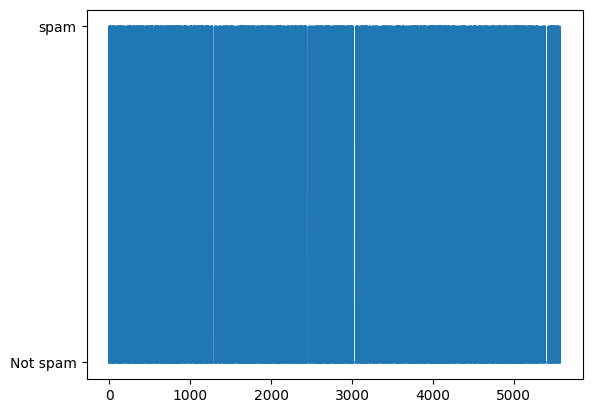

In [75]:
print(data.shape)
data.info
plt.plot(data['Label'])

In [31]:
data.loc[data['Label']=='spam','Label',] = 0
data.loc[data['Label']=='Not spam','Label',] = 1

In [32]:
print(data)

     Label                                          EmailText Unnamed: 2  \
0        1  Go until jurong point, crazy.. Available only ...          0   
1        1                      Ok lar... Joking wif u oni...          0   
2        0  Free entry in 2 a wkly comp to win FA Cup fina...          0   
3        1  U dun say so early hor... U c already then say...          0   
4        1  Nah I don't think he goes to usf, he lives aro...          0   
...    ...                                                ...        ...   
5567     0  This is the 2nd time we have tried 2 contact u...          0   
5568     1              Will Ì_ b going to esplanade fr home?          0   
5569     1  Pity, * was in mood for that. So...any other s...          0   
5570     1  The guy did some bitching but I acted like i'd...          0   
5571     1                         Rofl. Its true to its name          0   

     Unnamed: 3 Unnamed: 4  
0             0          0  
1             0          0  


In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [57]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [58]:
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


In [60]:
y_train = Y_train.astype('int')
y_test = Y_test.astype('int')
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3974)	0.2410582143632299
  (0, 4291)	0.3891385935794867
  (0, 6601)	0.20296878731699391
  (0, 3381)	0.3219352588930141
  (0, 2120)	0.38613577623520473
  (0, 3134)	0.440116181574609
  (0, 3257)	0.25877035357606315
  (0, 3375)	0.21807195185332803
  (0, 4508)	0.2909649098524696
  (1, 4056)	0.380431198316959
  (1, 6874)	0.4306015894277422
  (1, 6419)	0.4769136859540388
  (1, 6444)	0.5652509076654626
  (1, 7445)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2107)	0.42972812260098503
  (2, 3912)	0.40088501350982736
  (2, 2224)	0.413484525934624
  (2, 5820)	0.4917598465723273
  (3, 6133)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1840)	0.3708680641487708
  (3, 7455)	0.5202633571003087
  (4, 2529)	0.7419319091456392
  :	:
  (4452, 2120)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7275)	0.5787739591782677
  (4453, 1759)	0.45610005640082985
  (4454, 3027)	0.42618909997886
  (4454, 2084)	0.3809693742808703
  (4454, 3086)

In [61]:
model= LogisticRegression()

In [63]:
model.fit(X_train_features,y_train)

LogisticRegression()

In [65]:
Prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(y_train,Prediction_on_training_data)

In [66]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9661207089970832


In [73]:
input_mail=["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]
input_data_features=vectorizer.transform(input_mail)
prediction=model.predict(input_data_features)
if (prediction[0]==1):
    print("Ham mail")
else:
    print("Spam mail")

Ham mail
